In [1]:
def roll_futures(df1, df2):
    '''Given a dataframe of front month contract and second month contract, return
    one dataframe of front month contract observations, where rows are replaced with values
    from the second month for dates that fall between my desired "rolling period" and the expiration
    of the 'front month' contract'''
    

In [1]:
def find_turning_point(df):
    '''Find tops and bottoms of cycles, defined as local maxima/minima'''
    

In [2]:
def record_trend(start, stop, direction):
    '''Returns a dictionary with date, price tuples for start and end dates of trends'''
    
    if direction == up:
        trend = {
            'Start': (start, start['Low'])
            'Stop': (stop, stop['Low'])
            'Start Price': 
            'End Price': 
        }

SyntaxError: invalid syntax (<ipython-input-2-c843a587b855>, line 7)

In [ ]:
# for local maxima
maxs = argrelextrema(decomp.trend.values, np.greater, order=5)
max_dates = [wheat['2016'].iloc[i].index for i in maxs]
maxes = [date for date in wheat['2016'].index if date in max_dates[0]]

# for local minima
mins = argrelextrema(decomp.trend.values, np.less, order=5)
min_dates = [wheat['2016'].iloc[i].index for i in mins]
mines = [date for date in wheat['2016'].index if date in min_dates[0]]

In [1]:
def record_trend(start, stop, direction):
    '''Returns a dictionary with date, price tuples for start and end dates of trends'''
    
    if direction == up:
        trend = {
            'Start': (start, start['Low'])
            'Stop': (stop, stop['Low'])
            'Start Price': 
            'End Price': 
        }

SyntaxError: invalid syntax (<ipython-input-1-c843a587b855>, line 7)

In [2]:
def identify_trend(df, period=30):
    '''Given time series price data, identify upward and downward trending markets'''
    
    # Calculate change in moving average
    df['{}dma_slope'.format(period)] = df['{}dma'.format(period)].pct_change()
    
    for i, row in df.iterrows():
        if is_up == False:
            if row['{}dma_slope'.format(period)] > 0: # check for the start of an uptrend
                uptrends += 1
                is_up = True
                is_down = False
                is_flat = False
                is_unclassified = False
                uptrend_starts.append(i)
        elif is_up == True: 
            if row['{}dma_slope'.format(period)] <= 0: # check for the end of an uptrend
                is_up = False
                uptrend_stops.append(i)
        if is_down == False:
            if row['{}dma_slope'.format(period)] < 0: # check for the start of a downtrend
                downtrends += 1
                is_up = False
                is_down = True
                downtrend_starts.append(i)
        elif is_down == True:
            if row['{}dma_slope'.format(period)] >= 0: # check for the end of a downtrend
                is_down = False
                downtrend_stops.append(i)

In [3]:
def trend_tracker(df, period=30):
    '''Given time series price data, identify upward and downward trending markets'''
    
    # Calculate change in moving average
    df['{}dma_slope'.format(period)] = df['{}dma'.format(period)].pct_change()
    
    # Initialize counters for uptrends and downtrends...
    uptrends = 0
    downtrends = 0
    ranges = 0

    # ...lists to contain start and stop dates...
    uptrend_starts = []
    uptrend_stops = []
    downtrend_starts = []
    downtrend_stops = []
    flat_starts = []
    flat_stops = []
    
    # ...and booleans to indicate if the current market is in an uptrend or downtrend
    is_up = False
    is_down = False
    is_flat = False
    
    for i, row in df.iterrows():
        if is_flat == False:
            if (row['{}dma_slope'.format(period)] < 0.5) & (row['{}dma_slope'.format(period)] > -0.5):
                ranges += 1
                is_flat = True
                is_up = False
                is_down = False
                flat_starts.append(i)
        elif is_flat == True:
            if (row['{}dma_slope'.format(period)] < 0.5) | (row['{}dma_slope'.format(period)] > -0.5):
                flat_stops.append(i)
                
        if is_up == False:
            if row['{}dma_slope'.format(period)] > 0.5: # check for the start of an uptrend
                uptrends += 1
                is_up = True
                is_down = False
                is_flat = False
                is_unclassified = False
                uptrend_starts.append(i)
        elif is_up == True: 
            if row['{}dma_slope'.format(period)] <= 0: # check for the end of an uptrend
                is_up = False
                uptrend_stops.append(i)
                
        if is_down == False:
            if row['{}dma_slope'.format(period)] < -0.5: # check for the start of a downtrend
                downtrends += 1
                is_up = False
                is_down = True
                is_flat = False
                downtrend_starts.append(i)
        elif is_down == True:
            if row['{}dma_slope'.format(period)] >= 0: # check for the end of a downtrend
                is_down = False
                downtrend_stops.append(i)
            
    return uptrends, downtrends, ranges, uptrend_starts, uptrend_stops, downtrend_starts, downtrend_stops, flat_starts, flat_stops

# Code from DY

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

import math

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split

%matplotlib inline

/home/mattg/anaconda3/envs/dsi/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


/home/mattg/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def create_window(data, window_size = 1):    
    data_s = data.copy()
    for i in range(window_size):
        data = pd.concat([data, data_s.shift(-(i + 1))], 
                            axis = 1)
        
    data.dropna(axis=0, inplace=True)
    return(data)

In [3]:
window_size = 1

casual_window = create_window(casual, window_size = window_size)

X = casual_window.iloc[:, 0:1]
y = casual_window.iloc[:, 1]

X = np.reshape(X.values, (X.shape[0], 1, X.shape[1]))

# Will use internal validation inside of Keras -- this is the equivalent
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

NameError: name 'casual' is not defined

In [4]:
# create and fit the LSTM network
model = Sequential()

# model.add(LSTM(4, input_shape=(1, window_size-1)))
model.add(LSTM(input_shape=(X.shape[1], X.shape[2]), units=25, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_logarithmic_error', optimizer='adam')
history = model.fit(x=X, y=y.values, epochs=800, batch_size=70, verbose=0, validation_split=.3)

NameError: name 'X' is not defined

In [6]:
metrics = pd.DataFrame(history.history, columns=['val_loss', 'loss'])

NameError: name 'history' is not defined

NameError: name 'X' is not defined

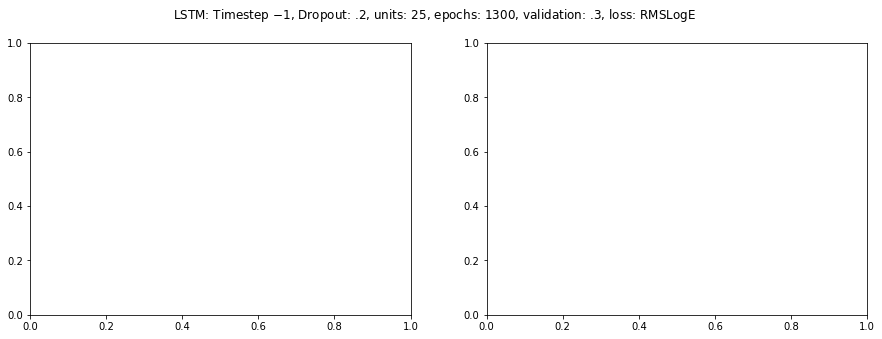

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle("LSTM: Timestep $-1$, Dropout: .2, units: 25, epochs: 1300, validation: .3, loss: RMSLogE")

y_hat = model.predict(X)

results = pd.DataFrame(list(zip(y_hat, X)), columns=["y_hat", "var"])
results['y_hat'] = results['y_hat'].map(lambda y_hat: y_hat[0])
results['var'] = results['var'] = results['var'].map(lambda var: var[0][0])
results.plot(ax=ax[1])
metrics.plot(ax=ax[0])


In [8]:
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])